# Machine Learning for classification

## using machine learning to predict churn

## This project is churn prediction for a telecom company

# Telco churn dataset

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Initial data preparation

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#path to the dataset

file = "gdrive/My Drive/Colab Notebooks/Customer_Churn.csv"

In [4]:
#reading in the dataset 

df = pd.read_csv(file)

In [5]:
# checking how many rows the dataset has

len(df)

7043

In [6]:
# Viewing the first 5 rows

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Transposing the dataframe to get a better view of the rows 

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
# viewing the col data types

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Forcing the TotalCharges col to be numeric 

total_charges = pd.to_numeric(df.TotalCharges,errors="coerce")

In [10]:
# Confirming that there are non-numeric characters in the data
df[total_charges.isnull()][["customerID","TotalCharges"]]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [11]:
# setting the missing values to 0

df.TotalCharges = df.TotalCharges.fillna(0)

In [12]:
# making the col names uniform

df.columns = df.columns.str.lower().str.replace(" ","_")

In [13]:
# making all the string col values uniform

string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
  df[col] = df[col].str.lower().str.replace(" ","_")

In [14]:
# Converting the target varaible churn from yes and no to numbers 1 for yes and 0 for no

df.churn = (df.churn == "yes").astype(int)

In [15]:
# Using scikit learn to split the data

from sklearn.model_selection import train_test_split

In [16]:
df_train_full, df_test = train_test_split(df,test_size=0.2,random_state=1)

In [17]:
# taking the df_train_full and splitting one more time to get the validation set

df_train,df_val = train_test_split(df_train_full,test_size = 0.33,random_state=1)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train["churn"]
del df_val["churn"]

# Exploratory data analysis

In [18]:
# Checking to see of any other cols have missing values

df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [19]:
# since the values are 0 there are no missing values

In [20]:
# Checking the distribution of values in the target variable

df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [21]:
# finding the churn rate 

1521/5634

0.26996805111821087

In [22]:
# another way to calculate the churn rate is to use the mean

global_mean = df_train_full.churn.mean()

round(global_mean,3)

0.27

In [23]:
# creating two list categorical and numerical

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [24]:
# viewing the number of unique values each categorical col has

df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature importance

In [25]:
# checking the churn rate for female customers

female_mean = df_train_full[df_train_full.gender == "female"].churn.mean()
female_mean

0.27682403433476394

In [26]:
# checking the churn rate for male customers
male_mean = df_train_full[df_train_full.gender == "male"].churn.mean()
male_mean

0.2632135306553911

In [27]:
# when you compare the global churn rate compared with churn rates among males and females. The numbers are quite close which means gender is not a very useful variable when predicting
# churn


In [28]:
# checking the group churn rates for the partner col

partner_yes = df_train_full[df_train_full.partner == "yes"].churn.mean()
partner_no = df_train_full[df_train_full.partner == "no"].churn.mean()

print("partner yes churn rate: ",partner_yes)
print("partner no churn rate: ",partner_no)

partner yes churn rate:  0.20503330866025166
partner no churn rate:  0.3298090040927694


In [29]:
# As we see the rates for those who have a partner are quite different from rates for those who don't: 20% and 33% resp. It means that clients with no partner are more likely
# to churn than the ones with a partner

### Risk ratio

In [30]:
# Calculating the churn rate for all categorical variables

from IPython.display import display

for col in categorical:
  df_group = df_train_full.groupby(by=col).churn.agg(["mean"])
  df_group["diff"] = df_group["mean"] - global_mean
  df_group["rate"] = df_group["mean"] / global_mean
  display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


### Mutual information

In [31]:
# using scikit-learn to get mutual information

from sklearn.metrics import mutual_info_score

def calculate_mi(series):
  return mutual_info_score(series,df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending = False).to_frame(name="MI")
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


### Correlation coefficient

In [32]:
# Calculating correlation of numerical variables

df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
dtype: float64

# Feature engineering

In [33]:
# Transforming all categorical variables to numeric features

## One-hot encoding for categorical variables

In [34]:
#using the one-hot encoding method DictVectorizer

#first converting our dataframe to a list of dictionaries

train_dict = df_train[categorical + numerical].to_dict(orient="records")
train_dict

[{'contract': 'month-to-month',
  'dependents': 'no',
  'deviceprotection': 'no',
  'gender': 'male',
  'internetservice': 'fiber_optic',
  'monthlycharges': 85.55,
  'multiplelines': 'no',
  'onlinebackup': 'yes',
  'onlinesecurity': 'no',
  'paperlessbilling': 'yes',
  'partner': 'no',
  'paymentmethod': 'electronic_check',
  'phoneservice': 'yes',
  'seniorcitizen': 1,
  'streamingmovies': 'yes',
  'streamingtv': 'no',
  'techsupport': 'no',
  'tenure': 5,
  'totalcharges': '408.5'},
 {'contract': 'month-to-month',
  'dependents': 'no',
  'deviceprotection': 'yes',
  'gender': 'female',
  'internetservice': 'fiber_optic',
  'monthlycharges': 102.95,
  'multiplelines': 'yes',
  'onlinebackup': 'yes',
  'onlinesecurity': 'yes',
  'paperlessbilling': 'yes',
  'partner': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'phoneservice': 'yes',
  'seniorcitizen': 0,
  'streamingmovies': 'no',
  'streamingtv': 'yes',
  'techsupport': 'no',
  'tenure': 67,
  'totalcharges': '6886.25'},


In [35]:
# Using DictVectorizer We create it and then fit it to the list of dictionaries 

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)

In [36]:
# After fitting the vectorizer we convert the dictionaries to a matrix by using the transform method

X_train = dv.transform(train_dict)

In [37]:
# Viewing the first row

print(X_train[0])

[1. 0. 0. ... 0. 0. 0.]


In [38]:
# Getting the names of all cols

dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

# Machine learning for classification

## Logistic regression

### Training logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# Training the model by calling the fit method

model = LogisticRegression(solver="liblinear",random_state=1)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Applying our model to validation dataset to obtain the probability of churn for each customer in the validation dataset

#applying one-hot encoding scheme to all the categorical variables. first we convert the dataframe to a list of dictionaries
#and then feed it to the DictVectorizer

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [42]:
# applying the matrix to this matrix to the model to get the probablitiies using predict_proba method

y_pred = model.predict_proba(X_val)

In [43]:
# We only need one col from y_pred since both convey the same information

y_pred = model.predict_proba(X_val)[:,1]

In [44]:
# Writting the results as a churn array the threshold is 0.5

churn = y_pred >= 0.5

In [45]:
# first measure is accuracy
(y_val == churn).mean()

0.8059139784946237

## Model interpretation

In [46]:
# To see which feature is associated with each weight we use the get_features_names method of the DictVectorizer 
# and zip the feature names together with coefficients before looking at them

dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.656,
 'contract=one_year': 0.059,
 'contract=two_year': -0.761,
 'dependents=no': 0.005,
 'dependents=yes': -0.051,
 'deviceprotection=no': 0.062,
 'deviceprotection=no_internet_service': -0.179,
 'deviceprotection=yes': 0.071,
 'gender=female': -0.014,
 'gender=male': -0.032,
 'internetservice=dsl': -0.524,
 'internetservice=fiber_optic': 0.657,
 'internetservice=no': -0.179,
 'monthlycharges': -0.009,
 'multiplelines=no': -0.25,
 'multiplelines=no_phone_service': 0.042,
 'multiplelines=yes': 0.162,
 'onlinebackup=no': 0.067,
 'onlinebackup=no_internet_service': -0.179,
 'onlinebackup=yes': 0.066,
 'onlinesecurity=no': 0.236,
 'onlinesecurity=no_internet_service': -0.179,
 'onlinesecurity=yes': -0.103,
 'paperlessbilling=no': -0.221,
 'paperlessbilling=yes': 0.175,
 'partner=no': -0.103,
 'partner=yes': 0.057,
 'paymentmethod=bank_transfer_(automatic)': -0.058,
 'paymentmethod=credit_card_(automatic)': -0.013,
 'paymentmethod=electronic_check': 0.076,
 'p

In [47]:
#building a smaller model to gain a better understands of what is going on

small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)
 
X_small_train = dv_small.transform(train_dict_small)

In [48]:
# Viewing the features that the small model will use

dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'tenure',
 'totalcharges=100.4',
 'totalcharges=100.8',
 'totalcharges=100.9',
 'totalcharges=1001.5',
 'totalcharges=1004.5',
 'totalcharges=1006.9',
 'totalcharges=1007.8',
 'totalcharges=1007.9',
 'totalcharges=1008.7',
 'totalcharges=101.65',
 'totalcharges=101.9',
 'totalcharges=1011.05',
 'totalcharges=1011.8',
 'totalcharges=1012.4',
 'totalcharges=1013.2',
 'totalcharges=102.45',
 'totalcharges=102.75',
 'totalcharges=1020.2',
 'totalcharges=1021.8',
 'totalcharges=1022.5',
 'totalcharges=1022.95',
 'totalcharges=1023.75',
 'totalcharges=1023.9',
 'totalcharges=1023.95',
 'totalcharges=1024',
 'totalcharges=1024.65',
 'totalcharges=1024.7',
 'totalcharges=1025.95',
 'totalcharges=1028.75',
 'totalcharges=1029.35',
 'totalcharges=1029.8',
 'totalcharges=103.7',
 'totalcharges=1031.7',
 'totalcharges=1032',
 'totalcharges=1032.05',
 'totalcharges=1033',
 'totalcharges=1033.9',
 'totalcharges=1035.5',
 'total

In [49]:
# training the small model on this set of features

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Viewing the bias term

model_small.intercept_[0]

-0.9827172065806695

In [51]:
# Viewing the other weights 

dict(zip(dv_small.get_feature_names(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.981,
 'contract=one_year': -0.323,
 'contract=two_year': -1.641,
 'tenure': -0.016,
 'totalcharges=100.4': 0.418,
 'totalcharges=100.8': 0.405,
 'totalcharges=100.9': -0.385,
 'totalcharges=1001.5': -0.09,
 'totalcharges=1004.5': -0.099,
 'totalcharges=1006.9': -0.033,
 'totalcharges=1007.8': -0.095,
 'totalcharges=1007.9': -0.093,
 'totalcharges=1008.7': -0.027,
 'totalcharges=101.65': -0.398,
 'totalcharges=101.9': -0.391,
 'totalcharges=1011.05': -0.348,
 'totalcharges=1011.8': -0.363,
 'totalcharges=1012.4': -0.094,
 'totalcharges=1013.2': -0.029,
 'totalcharges=102.45': 0.405,
 'totalcharges=102.75': 0.408,
 'totalcharges=1020.2': -0.369,
 'totalcharges=1021.8': 0.781,
 'totalcharges=1022.5': -0.323,
 'totalcharges=1022.95': -0.094,
 'totalcharges=1023.75': -0.133,
 'totalcharges=1023.9': 0.454,
 'totalcharges=1023.95': -0.029,
 'totalcharges=1024': -0.047,
 'totalcharges=1024.65': -0.029,
 'totalcharges=1024.7': -0.033,
 'totalcharges=1025.95': 0.447

## Using the model

In [52]:
# First take the customer we want to score and put all the variable values in a dictionary

customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [53]:
# First convert the dictionary to a matrix by using the DictVectorizer

X_test = dv.transform([customer])

In [54]:
# Now taking the matrix and put it into the trained model

model.predict_proba(X_test)

array([[0.93400096, 0.06599904]])

In [55]:
# The output is a matrix with predictions. For each customer it outputs two numbers which are the probability of staying with the company and the probability of
# churn

In [56]:
# We only need the number from the first row and the second col: the probability of churning for this customer

model.predict_proba(X_test)[0,1]

0.06599904311809375

In [57]:
# since the probablity is 6% it's unlikely the customer will churn 

In [58]:
# Trying another customer

customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [59]:
# making the prediction

X_test = dv.transform([customer])
model.predict_proba(X_test)[0,1]

0.810550123652325

In [60]:
# This customer has a high chance to churn at 81% 

# Evaluation metrics for classification

## Evaluation metrics

### Classification accuracy

In [61]:
# accuracy of a binary classification model is the percentage of correct predictions 

In [62]:
# Computing accuracy on the validation dataset is easy we simply calculate the fraction of correct predictions

y_pred = model.predict_proba(X_val)[:,1]
churn = (y_pred >= 0.5)
(churn == y_val).mean()

0.8059139784946237

In [63]:
# using the scikit learn metrics package

from sklearn.metrics import accuracy_score

In [64]:
# now looping over different thresholds and check which one gives the best accuracy 

thresholds = np.linspace(0, 1,11)

for t in thresholds:
  churn = y_pred >= t
  acc = accuracy_score(y_val,churn)
  print("%0.2f %0.3f"%(t,acc)) 

0.00 0.269
0.10 0.589
0.20 0.692
0.30 0.749
0.40 0.782
0.50 0.806
0.60 0.804
0.70 0.773
0.80 0.744
0.90 0.731
1.00 0.731


In [65]:
# setting up a plot to show how accuracy changes depending on the threshold

thresholds = np.linspace(0, 1,21)

accuracies = []

for t in thresholds:
  churn = y_pred >= t
  acc = accuracy_score(y_val,churn)
  accuracies.append(acc)

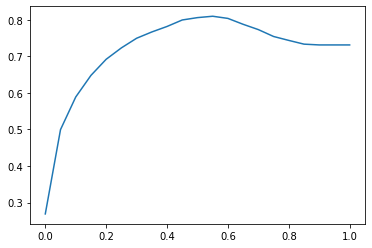

In [66]:
#plottting the values using Matplotlib

plt.plot(thresholds,accuracies)

In [67]:
# checking the accuracy for the simpler model we created earlier that only had three variables contract, tenure and total charges

val_dict_small = df_val[small_subset].to_dict(orient='rows')
 
X_small_val = dv_small.transform(val_dict_small) 
y_pred_small = model_small.predict_proba(X_small_val)[:, 1] 
 
churn_small = y_pred_small >= 0.5
accuracy_score(y_val, churn_small)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


0.7327956989247312

### Dummy baseline

In [68]:
# 80% seems like a decent number but to understand whether it's actually good we need to relate it to something for example a simple baseline that's easy to
# understand Once such baseline could be a dummy model that always predicts the same value the dummy model can always predict the majority class
# no churn

In [69]:
# creating this baseline prediction

size_val = len(y_val)
baseline = np.repeat(False, size_val)

In [70]:
# Now checking the accuracy of this baseline prediction using the same code as previously

accuracy_score(baseline,y_val)

0.7311827956989247

In [71]:
# churn prediction is a complex problem and maybe this improvement is great but it isn't evident from the accracy score alone. 
# according to accuracy our model is only slightly better than a dummy model that treats all the customers as non-churning and doesn't
# attempt to keep any of them

## Confusion table

## Introduction to confusion table

## Calculating the confusion table wtih NumPy

In [72]:
# creating the following groups using numpy true positive, false positive, false negative, true negative

t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)
 
actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)
 
true_positive = (predict_churn & actual_churn).sum() 
false_positive = (predict_churn & actual_no_churn).sum()
 
false_negative = (predict_no_churn & actual_churn).sum() 
true_negative = (predict_no_churn & actual_no_churn).sum()

In [73]:
# Putting all the values together in a Numpy array


confusion_table = np.array(
 [[true_negative, false_positive],
 [false_negative, true_positive]])

In [74]:
#Viewing the matrix

confusion_table

array([[1224,  136],
       [ 225,  275]])

In [75]:
# turing the numbers into fractions by dividing each value by the total number of items to better understand the numbers

confusion_table / confusion_table.sum()

array([[0.65806452, 0.07311828],
       [0.12096774, 0.14784946]])

# Precision and recall

In [76]:
# accuracy can be misleading when dealing with imbalanced datasets such as ours. There are other metrics that can be helpful to use for such cases
# precision and recall

In [77]:
# Calculating the precision of the model is p = TP/(TP+FP) in our model it's 62%

In [78]:
# The formula for calculating recall is R = TP/(TP+FN) in our model it's 59%

## ROC curve and AUC score

### True positive rate and false positive rate 

In [79]:
# ROC curve is based on two quantities FPR and TPR

# False positive rate(FPR) - The fraction of false positive among all negatives examples

# True positive rate(TPR) - The fraction of true positives among all positive examples

In [80]:
# FPR = FP/(FP+TN)

# TPR = TP/(TP+FN)

In [81]:
# In our model the FPR = 172/1374 = 12.5%

#a small value for FPR tells us that a model is good. it has few false positives

In [82]:
# In our model the TPR = 59%

# The higher the TPR is the better

In [83]:
# We still consider FPR and TPR metrics only at one threshold value in our case 0.5. To be able to use them for ROC curves we need to calculate
# these netrics for many different threshold values

## Evaluating a model at multiple thresholds

In [84]:
# Computing the confusion table for different thresholds

scores = []
 
thresholds = np.linspace(0, 1, 101)
 
for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

In [85]:
# converting the list of tuples to a pandas dataframe

df_scores = pd.DataFrame(scores)
df_scores.columns  = ["threshold","tp","fp","fn","tn"]

In [86]:
#Viewing every 10th record of the dataframe

df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,500,1360,0,0
10,0.1,477,742,23,618
20,0.2,439,512,61,848
30,0.3,392,358,108,1002
40,0.4,331,237,169,1123
50,0.5,275,136,225,1224
60,0.6,213,78,287,1282
70,0.7,112,34,388,1326
80,0.8,25,2,475,1358
90,0.9,0,0,500,1360


In [87]:
#Computing the TPR and FPR scores

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [88]:
# Viewing every 10th record

df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,500,1360,0,0,1.000,1.000000
10,0.1,477,742,23,618,0.954,0.545588
20,0.2,439,512,61,848,0.878,0.376471
30,0.3,392,358,108,1002,0.784,0.263235
40,0.4,331,237,169,1123,0.662,0.174265
50,0.5,275,136,225,1224,0.550,0.100000
60,0.6,213,78,287,1282,0.426,0.057353
70,0.7,112,34,388,1326,0.224,0.025000
80,0.8,25,2,475,1358,0.050,0.001471
90,0.9,0,0,500,1360,0.000,0.000000


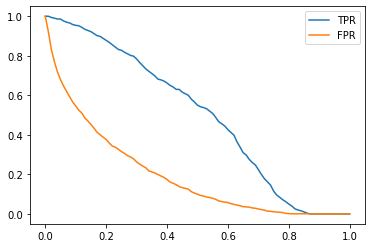

In [89]:
# Plotting them

plt.plot(df_scores.threshold, df_scores.tpr,label="TPR")
plt.plot(df_scores.threshold,df_scores.fpr,label="FPR")
plt.legend()

## Random baseline model

In [90]:
# generating an array with uniform random numbers

np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))

In [91]:
# Calculating the FPR and TPR for our random model.
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
 
    thresholds = np.linspace(0, 1, 101)
 
    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t, tp, fp, fn, tn))
 
    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
 
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
 
    return df_scores

In [92]:
# using the function to calculate the TPR and FPR for the random model

df_rand = tpr_fpr_dataframe(y_val,y_rand)

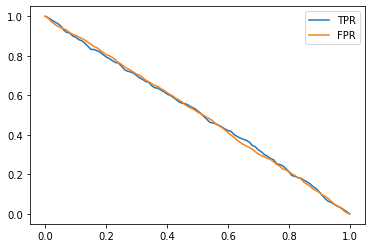

In [93]:
#Plotting the FPR and TPR for the random model

plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

## The ideal model

In [94]:
# The ideal model orders customers such that first we have non-churning customers, and then churning ones

In [95]:
# creating our ideal model

num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0,1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,500,1360,0,0,1.000,1.000000
1,0.01,500,1341,0,19,1.000,0.986029
2,0.02,500,1322,0,38,1.000,0.972059
3,0.03,500,1304,0,56,1.000,0.958824
4,0.04,500,1285,0,75,1.000,0.944853
...,...,...,...,...,...,...,...
96,0.96,75,0,425,1360,0.150,0.000000
97,0.97,56,0,444,1360,0.112,0.000000
98,0.98,38,0,462,1360,0.076,0.000000
99,0.99,19,0,481,1360,0.038,0.000000


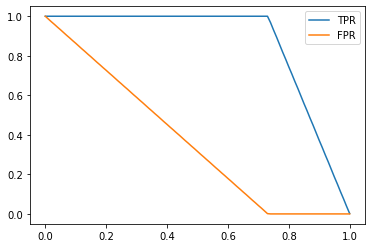

In [96]:
#plotting the model
plt.plot(df_ideal.threshold, df_ideal.tpr, label= "TPR")
plt.plot(df_ideal.threshold, df_ideal.fpr, label= "FPR")
plt.legend()

## ROC Curve

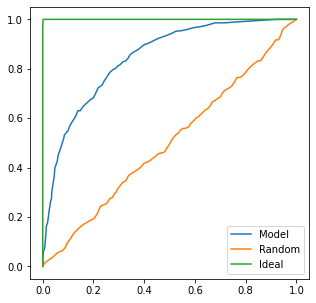

In [97]:
plt.figure(figsize=(5, 5))
 
plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')
 
plt.legend()

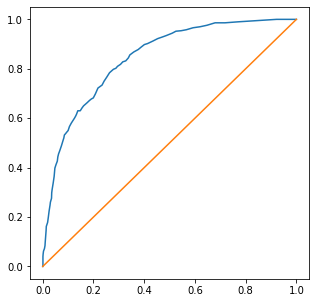

In [98]:
# reducing the code to plotting the curves as follows

plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0,1],[0,1])

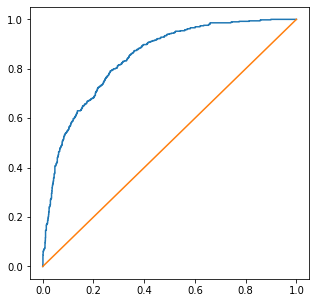

In [99]:
# using the roc_curve function from the metrics packages of Scikit-Learn

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val,y_pred)

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

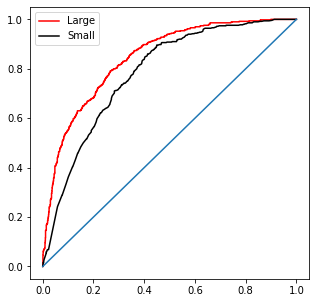

In [100]:
#plotting the ROC curves of the large and small models and plot them on the same graph

fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)
 
plt.figure(figsize=(5, 5))
 
plt.plot(fpr_large, tpr_large, color='red', label='Large')
plt.plot(fpr_small, tpr_small, color='black', label='Small')
plt.plot([0, 1], [0, 1])
plt.legend()

In [101]:
# as you can see the large curve is better cause it's closer to the ideal point

## Area under the ROC curve(AUC)

In [102]:
# Calculating AUC for our models 

from sklearn.metrics import auc

auc(df_scores.fpr,df_scores.tpr)

0.8436602941176471

In [103]:
# If all you need is the AUC we don't need to compute the ROC curve first

from sklearn.metrics import roc_auc_score

roc_auc_score(y_val,y_pred)

0.8441139705882355

In [104]:
# AUC tells us the probability of that happening: it’s the probability that the score of a randomly selected churning customer is higher than the score of a randomly selected non-churning one

In [105]:
# We can verify that. If we do this experiment 10,000 times and then count how many times the score of the positive example was higher than the score of the negative one, the percentage of cases when it’s true should roughly correspond to the AUC:

neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]
 
np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

0.8411

# Parameter tuning

## K-fold cross-validation

In [106]:
# In order to use k-fold cross validation we need to make the training process simpler so we create a function to do that

def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='rows')
 
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
 
    X = dv.transform(cat)
 
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
 
    return dv, model

In [107]:
# Apply the model to new data

def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='rows')
 
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
 
    return y_pred

In [108]:
# Implementing k-fold cross-validation on the model

from sklearn.model_selection import KFold
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
 
aucs = []
 
for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
 
    y_train = df_train.churn.values
    y_val = df_val.churn.values
 
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
 
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is d

In [109]:
# obtaining the mean and standard deviation

print("auc = %0.3f %0.3f"%(np.mean(aucs), np.std(aucs)))

auc = 0.841 0.011


# Finding best parameters

In [110]:
# selecting the cross-validation procedure for selecting the best parameter which controls the amount of regularization

#function for training the model with parameter C for controlling regularization

def train(df, y, C):
    cat = df[categorical + numerical].to_dict(orient='rows')
 
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
 
    X = dv.transform(cat)
 
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)
 
    return dv, model

In [111]:
# tuning the model selecting the best parameter C using cross-validation

nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)
 
for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
 
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
 
        y_train = df_train.churn.values
        y_val = df_val.churn.values
 
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
 
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
 
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is d

C=0.001, auc = 0.819 ± 0.013


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is d

C=0.01, auc = 0.838 ± 0.008


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is d

C=0.1, auc = 0.840 ± 0.007


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is d

C=0.5, auc = 0.840 ± 0.007


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is d

C=1, auc = 0.840 ± 0.007


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is d

C=10, auc = 0.835 ± 0.006


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


In [112]:
# using the c value of 0.5 cause the std is the smallest

In [113]:
# using the training and predict functions

y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv,model = train(df_train_full,y_train,C=0.5)
y_pred = predict(df_test,dv,model)

auc = roc_auc_score(y_test,y_pred)
print("auc = %.3f" % auc)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


auc = 0.857


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


# Deploying machine learning models

# Churn prediction model

## Using the model

In [114]:
# using the model to calcualate the probability of churning for the following customer

customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [115]:
#To predict if this customer is going to churn we use the predict function we wrote earlier

df = pd.DataFrame([customer])
y_pred = predict(df,dv,model)
y_pred[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


0.07325173117717906

In [116]:
# This customer has a 7% probability of churning

In [117]:
# To aviod doing this unnecessary conversion, we can create a separate function for predicting the probability of churn for a single customer

def predict_single(customer, dv, model):
    X = dv.transform([customer])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [118]:
#using it becomes simpler we simply invoke it with our customer

predict_single(customer,dv,model)

0.07325173117717906

# Using Pickle to save and load the model

In [120]:
# Pickle is a serialization/deserilzation module that's built-in into python we can save a python object to a file


#Saving the model

import pickle

with open("churn-model","wb") as f_out:
  pickle.dump(model,f_out)